In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [4]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
expt = 'KDS75_newbathy_JRA' 

In [5]:
temp = cc.get_nc_variable(expt, ncfile, 'temp',
                        chunks={'st_ocean': None}, n=9,
                        time_units="days since 1900-01-01")

u = cc.get_nc_variable(expt, ncfile, 'u',
                        chunks={'st_ocean': None}, n=9,
                        time_units="days since 1900-01-01")

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

In [6]:
# Definition the Pacific region: Depth 0-300 meters, Latitude along the Equator, Longitude 143E-265E
upper_temp_eq = temp.sel(time=slice('1902-01','1902-12')).sel(st_ocean=slice(0,300)).sel(yt_ocean=0., method='nearest').sel(xt_ocean=slice(-217,-95))
# mean along the Equator and time mean 
mean_upper_temp_eq = upper_temp_eq.mean('time')
mean_upper_temp_eq.shape

(34, 1220)

In [7]:
# Definition the Pacific region: Depth 0-300 meters, Latitude along the Equator, Longitude 143E-265E
upper_u_eq = u.sel(time=slice('1902-01','1902-12')).sel(st_ocean=slice(0,300)).sel(yu_ocean=0., method='nearest').sel(xu_ocean=slice(-217,-95))
# mean along the Equator and time mean 
mean_upper_u_eq = upper_u_eq.mean('time')

In [8]:
dep = upper_u_eq.st_ocean
lon_eq = upper_temp_eq.xt_ocean
lon_u_eq = upper_u_eq.xu_ocean

In [9]:
obs_file = xr.open_dataset('/g/data1/v45/fw4078/obs-data/meanfit_m.cdf')
obs_temp = obs_file['POTEMPM']
obs_temp_eq = obs_temp.sel(ZDEP1_50=slice(0,300)).sel(YLAT11_101=0., method='nearest')
lon_obs = obs_temp_eq.XLON
dep_obs = obs_temp_eq.ZDEP1_50

In [10]:
obs_u = obs_file['UM']
obs_u_eq = obs_u.sel(ZDEP1_50=slice(0,300)).sel(YLAT11_101=0., method='nearest')
lon_u_obs = obs_u_eq.XLON

Text(0.5,1,'JOHNSON')

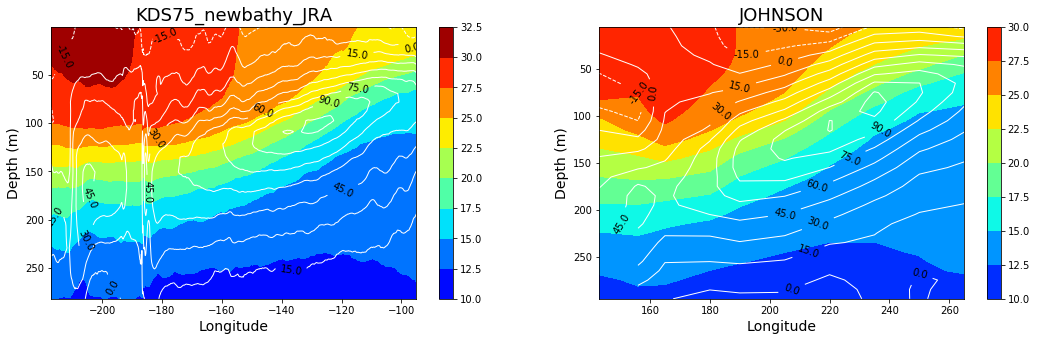

In [11]:
Tmax = 120; Tmin = -30; delT = 15
clevels = np.arange(Tmin,Tmax+delT,delT)

fig_eqobs = plt.figure( figsize=(18,5) )

ax = fig_eqobs.add_subplot(121)
#ax.set_axis_bgcolor('gray')
ax1 = ax.contourf(lon_eq, dep, mean_upper_temp_eq, cmap=plt.cm.jet, vmin=8., vmax=32.)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lon_u_eq, dep, mean_upper_u_eq*100, colors = 'w', linewidths=1,levels=clevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lon_u_eq, dep, mean_upper_u_eq, 8, colors='black')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title(expt, fontsize=18)

ax = fig_eqobs.add_subplot(122)
#ax.set_axis_bgcolor('gray')
ax1 = ax.contourf(lon_obs, dep_obs, obs_temp_eq, cmap=plt.cm.jet, vmin=7., vmax=32.)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lon_u_obs, dep_obs, obs_u_eq*100, colors = 'w', linewidths=1,levels=clevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lon_u_eq, dep, mean_upper_u_eq, 8, colors='black')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title('JOHNSON', fontsize=18)

#fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
#plt.savefig('seasonal_cycle.png')